In [16]:
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
import math

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

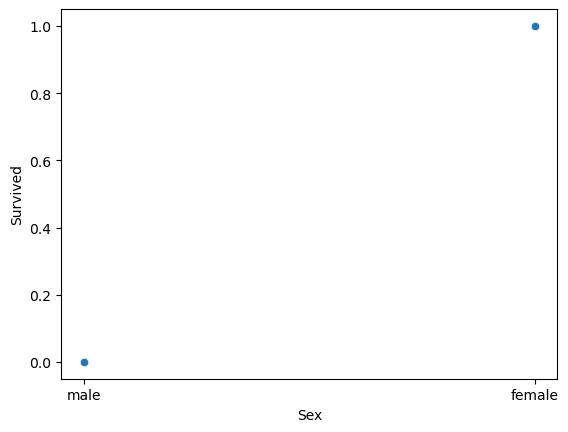

In [4]:
sns.scatterplot(data=df, x='Sex', y='Survived')

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.drop(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Fare', 'Embarked'], axis=1, inplace=True)

In [8]:
newCol = {'NewSex': []}
for i in range(len(df)): 
    if df.iloc[i]['Sex'] == 'male': 
            newCol['NewSex'].append(1)
    else: 
        newCol['NewSex'].append(2)

In [10]:
df['NewSex'] = newCol['NewSex']

In [13]:
x = df.drop(['Survived'], axis=1)
y = df.drop(['Pclass', 'Sex', 'NewSex'], axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [17]:
# TRAINING THE MODEL 
# 1. pick a value for K 
# 2. given k and euclidean distance, determine the label of each value in test 

def kNN(dfX, dfY, k, unknown):
    allDistances = {} # {rowIndex: [distance, label]}
    for i in range(len(df)):
        distance = math.sqrt((df.iloc[i]['Pclass'] - unknown['Pclass'])**2 + (df.iloc[i]['NewSex'] - unknown['NewSex'])**2)
        allDistances[i] = [distance, dfY.iloc[i]['Survived']]
    return allDistances

In [ ]:
kNN(X_train, y_train, 3, X_test.iloc[0])

In [ ]:
# TEST K 
# Calculate the number of predictions we got right 